# Beta da ação MGLU3

Importação das bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

Para encontrarmos o beta da ação é necessário os dados da respectiva empresa e também do índice de mercado, no caso o Ibovespa.

In [2]:
assets=['MGLU3.SA','^BVSP']

data=pd.DataFrame()
for i in assets:
    data[i]=wb.DataReader(i, data_source='yahoo', start='2015-1-1')['Adj Close']
    
data.tail()

,MGLU3.SA,^BVSP
Date,,
2020-04-14,42.900002,79918.000000
2020-04-15,43.849998,78831.000000
2020-04-16,45.650002,77812.000000
2020-04-17,44.439999,78990.000000
2020-04-20,46.180000,77899.132812


Segue os códigos com operações matemáticas para chegarmos ao beta:

In [3]:
sec_returns=np.log(data/data.shift(1))

In [4]:
cov=sec_returns.cov()*252
cov

,MGLU3.SA,^BVSP
MGLU3.SA,0.486313,0.093372
^BVSP,0.093372,0.077067


In [5]:
cov_with_market=cov.iloc[0,1]
cov_with_market

0.09337244605375825

In [6]:
market_var=sec_returns['^BVSP'].var()*252
market_var

0.07706712436162852

In [7]:
MGLU3_beta=cov_with_market/market_var
print('Beta MGLU3: {:.2f}'.format(MGLU3_beta))

Beta MGLU3: 1.21


Com o beta de 1.35 a ação da MGLU3 tem uma volatilidade maior que a do mercado, portanto, mais arriscada.

# Análise de desempenho MGLU3 X Concorrentes

In [14]:
assets=['MGLU3.SA','VVAR3.SA','BTOW3.SA']

data=pd.DataFrame()
for i in assets:
    data[i]=wb.DataReader(i, data_source='yahoo', start='2017-1-1')['Adj Close']
    
data.tail()

,MGLU3.SA,VVAR3.SA,BTOW3.SA
Date,,,
2020-04-14,42.900002,6.09,59.500000
2020-04-15,43.849998,6.36,62.799999
2020-04-16,45.650002,6.48,64.349998
2020-04-17,44.439999,6.47,61.700001
2020-04-20,46.169998,6.42,64.050003


In [15]:
data['MGLU3.SA']=data['MGLU3.SA']/data['MGLU3.SA'][0]
data['BTOW3.SA']=data['BTOW3.SA']/data['BTOW3.SA'][0]
data['VVAR3.SA']=data['VVAR3.SA']/data['VVAR3.SA'][0]

Segue a comparação da variação das ações em questão desde 2015:

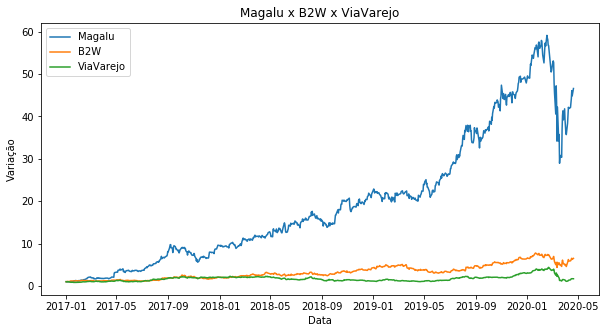

In [16]:
plt.figure(figsize=(10,5))
plt.plot(data['MGLU3.SA'], label='Magalu');
plt.plot(data['BTOW3.SA'], label='B2W');
plt.plot(data['VVAR3.SA'], label='ViaVarejo');
plt.title('Magalu x B2W x ViaVarejo')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.legend();

Ao analisar o gráfico, é perceptível o quão superior é a performance da MGLU em relação aos seus concorrentes desde 2017.

# Desempenho com Covid-19

Análise de desempenho em relação ao Covid-19, a partir do dia 1 de março.

In [11]:
assets=['MGLU3.SA','VVAR3.SA','BTOW3.SA']

data=pd.DataFrame()
for i in assets:
    data[i]=wb.DataReader(i, data_source='yahoo', start='2020-3-1')['Adj Close']
    
data.tail()

,MGLU3.SA,VVAR3.SA,BTOW3.SA
Date,,,
2020-04-14,42.900002,6.09,59.500000
2020-04-15,43.849998,6.36,62.799999
2020-04-16,45.650002,6.48,64.349998
2020-04-17,44.439999,6.47,61.700001
2020-04-20,46.200001,6.43,63.939999


In [12]:
data['MGLU3.SA']=data['MGLU3.SA']/data['MGLU3.SA'][0]
data['BTOW3.SA']=data['BTOW3.SA']/data['BTOW3.SA'][0]
data['VVAR3.SA']=data['VVAR3.SA']/data['VVAR3.SA'][0]

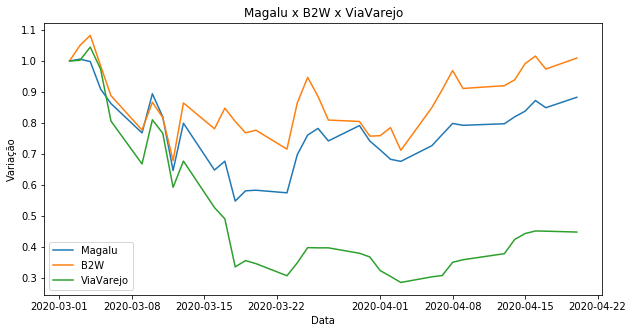

In [13]:
plt.figure(figsize=(10,5))
plt.plot(data['MGLU3.SA'], label='Magalu');
plt.plot(data['BTOW3.SA'], label='B2W');
plt.plot(data['VVAR3.SA'], label='ViaVarejo');
plt.title('Magalu x B2W x ViaVarejo')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.legend();

Com o COVID-19 a B2W foi a menos afeta, logo após vem a Magazine e por último a ViaVarejo, perdendo mais que a metade do seu valor de mercado.